# Sử dụng Machine Learning để dự đoán IC50 của một hỗn hợp các chất

## Phần 0: Tiền xử lý dữ liệu
\* Đây là bước để lấy dữ liệu từ bảng và gán chúng vào một số biến để xử lý

* Import một số thư viện

In [295]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import math

### Import dữ liệu và gán chúng vào biến
* X là chứa dữ liệu phổ của các chất từ 500 -> 210
* y là chứa dữ liệu log(IC50) của từng mẫu

In [249]:
dataset = pd.read_excel('Samples_data.xlsx', sheet_name='Sheet1')
rows = dataset.shape[0]
cols = dataset.shape[1]
X = dataset.iloc[:rows, 1:cols-2].values
y = dataset.iloc[:, cols-1].values

In [250]:
y = y.reshape(len(y),1)

In [251]:
X

array([[  12.75,   13.73,  312.75,  330.39,  360.78,  128.43],
       [  28.97,   32.07,  486.21,  516.21,  493.45,  212.07],
       [  28.09,   30.64,  351.06,  371.49,  471.06,  153.19],
       [  14.38,   16.44,  447.95,  474.66,  376.03,  152.05],
       [  24.  ,   26.  ,  663.  ,  701.  ,  494.  ,  149.  ],
       [  21.58,   23.74,  611.87,  645.32,  568.71,  184.53],
       [  21.43,   23.21,  408.93,  432.14,  458.93,  184.82],
       [  14.79,   16.9 ,  460.56,  488.03,  386.62,  156.34],
       [  43.01,   44.12,  432.35,  455.51,  515.07,  207.35],
       [  18.  ,   19.71,  401.14,  424.29,  474.  ,  173.14],
       [  20.27,   22.3 ,  400.34,  423.65,  486.49,  168.24],
       [  30.79,   32.78,  480.79,  507.62,  493.71,  128.15],
       [  18.35,   20.5 ,  424.1 ,  448.92,  560.07,  209.35],
       [  17.12,   18.75,  339.13,  366.85, 1027.99,  109.24],
       [  36.36,   38.18,  503.64,  531.82,  516.36,  173.64],
       [  17.71,   18.75,  319.79,  338.54,  396.88,  1

In [252]:
y

array([[4.89],
       [4.96],
       [5.  ],
       [5.03],
       [5.1 ],
       [5.12],
       [5.14],
       [5.16],
       [5.19],
       [5.2 ],
       [5.3 ],
       [5.37],
       [5.4 ],
       [5.42],
       [5.5 ],
       [5.24],
       [5.62]])

## Lấy dữ liệu để huấn luyện và dữ liệu để test
* Các dữ liệu để test theo như bài báo đề cập là S2, S8, S12, S15, S3
* Còn lại là dữ liệu để huấn luyện
* X_test là dữ liệu phổ các chất dùng để test
* y_test là dữ liệu log(IC50) dùng để test
* X_train là dữ liệu phổ các chất dùng để huấn luyện
* y_train là dữ liệu log(IC50) dùng để huấn luyện

* Sử dụng Standard Scalar để scale lại bộ dữ liệu training

In [253]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [254]:
X_test = []
y_test = []
X_train = []
y_train = []
for i in range(0, X.shape[0]):
    if i in (2, 5, 6, 9, 13):
        X_test.append(X[i])
        y_test.append(y[i])
    else:
        X_train.append(X[i])
        y_train.append(y[i])
X_test = np.array(X_test)
y_test = np.array(y_test)
X_train = np.array(X_train)
y_train = np.array(y_train)

In [255]:
X_test_origin = sc_X.inverse_transform(X_test)
y_test_origin = sc_y.inverse_transform(y_test)
X_train_origin = sc_X.inverse_transform(X_train)
y_train_origin = sc_y.inverse_transform(y_train)

## Phần 1: Multiple Linear Regression (MLR)

### Kiểm tra dựa trên model trên bài báo
* Bằng việc Sử dụng thuật toán MLR, nhóm tác giả đã tạo được mô hình như ở bên dưới 
* Có một điểm lưu ý là thay vì sử dụng toàn bộ 6 chất từ 500 đến 210, họ chỉ sử dụng 3 chất từ 405 đến 210 làm tham số cho mô hình. Em đang tìm hiểu vì sao lại có cái này và có thể là họ sử dụng một phương pháp là Backward Elemination để loại bỏ một số chất không có nhiều ảnh hưởng đi.

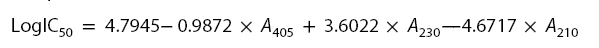

Ở đây, em với thử nghiệm mô hình này với từng tham số trong tập test, tính toán kết quả cả nó bằng phương trình trên và so sánh nó với kết quả thực tế mà người ta đo đạc được.

In [256]:
y_pred_pp = []
for i in range(0, X_test_origin.shape[0]): 
    log_ic50 = 4.7945 - 0.9872*X_test_origin[i][3]+3.6022*X_test_origin[i][4]-4.6717*X_test_origin[i][5]
    y_pred_pp.append(log_ic50)
    
y_pred_pp = np.array(y_pred_pp)
print("Dự đoán vs Thực tế")
print(np.concatenate( (y_pred_pp.reshape(len(y_pred_pp), 1), y_test_origin.reshape(len(y_test_origin), 1)), axis=1))

Dự đoán vs Thực tế
[[ 619.25    5.  ]
 [ 554.27    5.12]
 [ 367.92    5.14]
 [ 484.52    5.2 ]
 [2835.33    5.42]]


* <b>Kết quả có gì đó không ổn, em đang tìm hiểu thêm về việc này</b>

### Sử dụng thư viện để tự xây dựng mô hình
* Ở đây, thay vì chỉ sử dụng 3 tham số đầu vào như của nhóm tác giả, em sử dụng cả 6 tham số để xây dựng mô hình.
* Multiple Linear Regression là thuật toán đã được xây dựng sẵn trên thư viện sklearn, một thư viện rất nhiều người dùng trong cộng đồng học máy, mục đích ở đây là tham khảo xem là thư viện sẽ xây dựng được mô hình như thế nào.
* Theo như em đọc được ở bài nghiên cứu sau thì nhóm tác giả không sử dụng code để xây dựng mô hình mà sử dụng 2 phần mềm là Weka 3.8.1 và JMP 13.0

In [275]:
# Import và tạo Regression Model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
# Huấn luyện mô hình với tập dữ liệu huấn luyện
mlr.fit(X_train, y_train)

LinearRegression()

In [276]:
# Thực hiện dự đoán với các kết quả test bằng việc sử dụng mô hình
y_pred_mlr = sc_y.inverse_transform(mlr.predict(X_test))
np.set_printoptions(precision=2)
# In kết quả dự đoán so với thực tế đo được
print("MLR: Dự đoán vs thực tế")
merge_mlr = np.concatenate( 
        (y_pred_mlr.reshape(len(y_pred_mlr), 1), y_test_origin.reshape(len(y_test_origin), 1)), axis=1)
print(merge_mlr)

MLR: Dự đoán vs thực tế
[[5.36 5.  ]
 [5.14 5.12]
 [5.07 5.14]
 [5.22 5.2 ]
 [8.63 5.42]]


In [277]:
mlr.coef_

array([[  4.16,  -3.93, -55.88,  55.05,   2.9 ,  -0.82]])

In [278]:
mlr.coef_

array([[  4.16,  -3.93, -55.88,  55.05,   2.9 ,  -0.82]])

In [279]:
print("Tham số phương trình: f(x) = a0 + a1*A500 + a2*A495 + a3*A410 + a4*A405 + a5*230 + a6*210")
print("với a0 = " + str(mlr.intercept_[0]))
print("a1 = " + str(mlr.coef_[0][0]))
print("a2 = " + str(mlr.coef_[0][1]))
print("a3 = " + str(mlr.coef_[0][2]))
print("a4 = " + str(mlr.coef_[0][3]))
print("a5 = " + str(mlr.coef_[0][4]))
print("a6 = " + str(mlr.coef_[0][5]))


Tham số phương trình: f(x) = a0 + a1*A500 + a2*A495 + a3*A410 + a4*A405 + a5*230 + a6*210
với a0 = 1.0749190022047206
a1 = 4.16089807991879
a2 = -3.928898083854578
a3 = -55.87935728863914
a4 = 55.04655515592573
a5 = 2.899130808246466
a6 = -0.8151945308754751


### Nếu như chỉ làm với 3 biến cuối như trong ví dụ

In [285]:
X_train_3 = X_train[:, 3:]
X_train_3

array([[-1.3 , -0.97, -1.12],
       [ 0.57, -0.05,  1.67],
       [ 0.16, -0.86, -0.33],
       [ 2.43, -0.04, -0.43],
       [ 0.29, -0.79, -0.19],
       [-0.04,  0.1 ,  1.51],
       [-0.36, -0.1 ,  0.21],
       [ 0.49, -0.05, -1.13],
       [-0.1 ,  0.41,  1.57],
       [ 0.73,  0.11,  0.39],
       [-1.21, -0.72, -0.85],
       [-1.1 , -0.51, -1.13]])

In [291]:
mlr_3 = LinearRegression()
mlr_3.fit(X_train_3, y_train)

LinearRegression()

In [292]:
# Thực hiện dự đoán với các kết quả test bằng việc sử dụng mô hình
y_pred_mlr_3 = sc_y.inverse_transform(mlr_3.predict(X_test[:, 3:]))
np.set_printoptions(precision=2)
# In kết quả dự đoán so với thực tế đo được
print("MLR: Dự đoán vs thực tế")
merge_mlr_3 = np.concatenate( 
        (y_pred_mlr_3.reshape(len(y_pred_mlr_3), 1), y_test_origin.reshape(len(y_test_origin), 1)), axis=1)
print(merge_mlr_3)

MLR: Dự đoán vs thực tế
[[5.41 5.  ]
 [5.34 5.12]
 [5.16 5.14]
 [5.27 5.2 ]
 [7.63 5.42]]


## Phần 2: Support vector regression (SVR)

###  Sử dụng model của nhóm tác giả

* Nhóm tác giả sử dụng phần mềm Weka 3.8 để xây dựng mô hình bằng SVR, hiện em đang tải thử phần mềm này để test lại theo mô hình của họ.
* Các tham số mà họ sử dụng để xây dựng mô hình là C và gamma, ở đây họ chọn C = 1 và gamma = 0.1.
* Phần này em xin phép báo cáo sau, sau khi dựng lại dược mô hình

### Xây dựng model bằng code

* Ở đây, em xây dựng lại mô hình SVR bằng việc sử dụng thư viện sklearn, thư viện này cũng hỗ trợ xây dựng mô hình bằng SVR
* Do phương pháp SVR khá là phức tạp và chính em vẫn hơi mơ hồ về nó nên em sẽ giải thích về phương pháp này trong bài báo cáo tiếp theo, tạm thời là trước thứ 3

* Sử dụng thư viện sklearn để xây dựng mô hình bằng SVR với tham số C = 1.0 và gamma = 0.1 như nhóm tác giả

In [298]:
from sklearn.svm import SVR
svr = SVR(C=1.0, gamma=0.1, kernel='rbf')
svr.fit(X_train, y_train)

e:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(gamma=0.1)

* Dự đoán với mô hình vừa tạo được với tập dữ liệu test

* So sánh kết quả đo được so với thực tế

In [301]:
print("SVR: Dự đoán so với thực tế")
y_pred_svr = sc_y.inverse_transform(svr.predict(X_test).reshape(-1, 1))
print(np.concatenate( (y_pred_svr,
                      y_test_origin.reshape(len(y_test_origin), 1)), 
                     axis=1))

SVR: Dự đoán so với thực tế
[[5.37 5.  ]
 [5.14 5.12]
 [5.28 5.14]
 [5.25 5.2 ]
 [5.22 5.42]]


## Phần 3: Random Forest

### Sử dụng thư viện để tự xây dựng mô hình Random Forest

In [304]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train.reshape(len(y_train)))

RandomForestRegressor(random_state=0)

In [324]:
y_pred_rf = sc_y.inverse_transform(rf.predict(X_test).reshape(len(X_test),1)) 
print("Random Forest: Dự đoán so với thực tế")
print(np.concatenate((y_pred_rf, y_test_origin), 
                    axis=1))

Random Forest: Dự đoán so với thực tế
[[5.32 5.  ]
 [5.31 5.12]
 [5.3  5.14]
 [5.26 5.2 ]
 [5.47 5.42]]
